In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, SpatialDropout2D
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from tensorflow import keras
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split          
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import itertools


Pface=np.moveaxis(np.load('face_images.npz')['face_images'],-1,0)
LMs=pd.read_csv("facial_keypoints.csv")


cafer=cv2.imread("1.jpeg",0)
cafer=cafer.reshape(96,96,1)
cafer=cafer.reshape(1,96,96,1)




In [2]:
array1=np.array((LMs.left_eye_center_x.notna() & LMs.right_eye_center_x.notna() &
         LMs.nose_tip_x.notna() & LMs.mouth_center_bottom_lip_x.notna()))

iselect=array1.nonzero()[0]
Spic=Pface.shape[1]
m=iselect.shape[0]
X=np.zeros((m,Spic,Spic,1))
Y=np.zeros((m,8))

X[:,:,:,0]=Pface[iselect,:,:]/255.0
Y[:,0]=LMs.left_eye_center_x[iselect]/Spic
Y[:,1]=LMs.left_eye_center_y[iselect]/Spic
Y[:,2]=LMs.right_eye_center_x[iselect]/Spic
Y[:,3]=LMs.right_eye_center_y[iselect]/Spic
Y[:,4]=LMs.nose_tip_x[iselect]/Spic
Y[:,5]=LMs.nose_tip_y[iselect]/Spic
Y[:,6]=LMs.mouth_center_bottom_lip_x[iselect]/Spic
Y[:,7]=LMs.mouth_center_bottom_lip_y[iselect]/Spic
       
        
random_seed=41

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=random_seed)

model = Sequential()

model.add(Conv2D(32, (5, 5), padding = 'same', activation='relu', input_shape=(Spic, Spic, 1))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(8, activation='sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(Xtrain, Ytrain, batch_size=32, epochs=10, validation_data = (Xtest, Ytest), verbose = 1)



Epoch 1/10
175/175 [==============================] - 74s 423ms/step - loss: 0.0298 - val_loss: 0.0039
Epoch 2/10
175/175 [==============================] - 73s 419ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 3/10
175/175 [==============================] - 73s 415ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 4/10
175/175 [==============================] - 76s 432ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 5/10
175/175 [==============================] - 72s 414ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 6/10
175/175 [==============================] - 73s 415ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/10
175/175 [==============================] - 73s 415ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 8/10
175/175 [==============================] - 74s 420ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
175/175 [==============================] - 72s 410ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
175/175 [==============================] - 72s 414ms/step - l

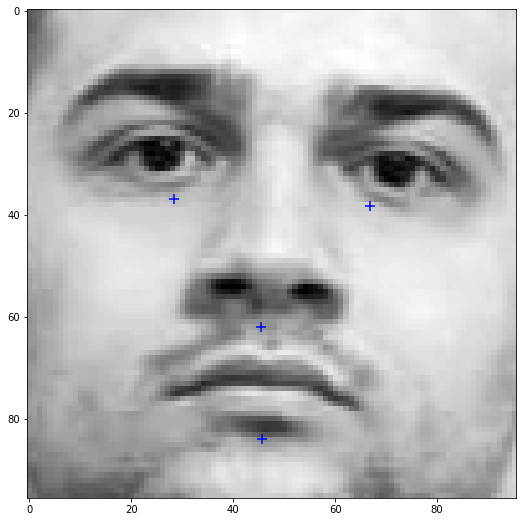

In [3]:
cafer=cv2.imread("1.jpeg",0)
cafer=cafer.reshape(96,96,1)
cafer=cafer.reshape(1,96,96,1)
cafer_pred= model.predict(cafer)
cafer=cafer.reshape(96,96)
plt.figure(figsize = (9,9))
plt.imshow(cafer,cmap='gray')
plt.scatter(cafer_pred[0,0::2]*Spic,cafer_pred[0,1::2]*Spic,marker='+',c='b',s=100)



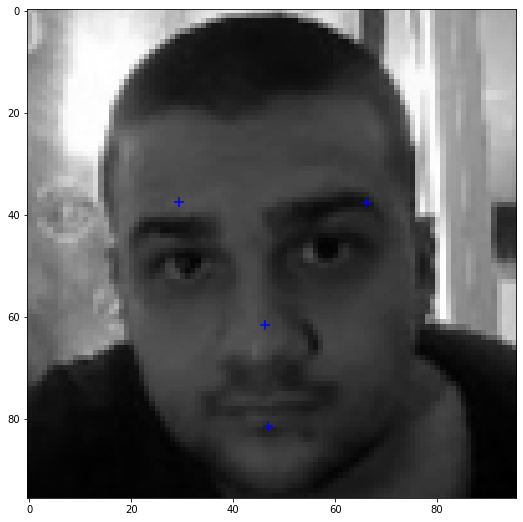

In [4]:
img=cv2.imread("cafer.jpg",0)
img=img.reshape(1,96,96,1)
b= model.predict(img)
img=img.reshape(96,96)
plt.figure(figsize = (9,9))
plt.imshow(img,cmap='gray')
plt.scatter(b[0,0::2]*Spic,b[0,1::2]*Spic,marker='+',c='b',s=100)

Text(0.5, 0.98, 'x: Manual; +: CNN')

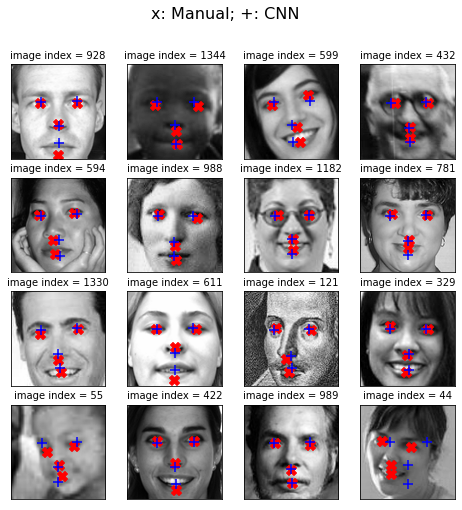

In [5]:
Ytrain_pred = model.predict(Xtrain)
Ytest_pred = model.predict(Xtest)

n = 0
nrows = 4
ncols = 4
irand=np.random.choice(Ytest.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(Xtest[irand[n],:,:,0], cmap='gray')
        ax[row,col].scatter(Ytest[irand[n],0::2]*Spic,Ytest[irand[n],1::2]*Spic,marker='X',c='r',s=100)
        ax[row,col].scatter(Ytest_pred[irand[n],0::2]*Spic,Ytest_pred[irand[n],1::2]*Spic,marker='+',c='b',s=100)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
        n += 1
plt.suptitle('x: Manual; +: CNN', fontsize=16)

In [6]:
len(Xtrain)

5600

In [7]:
distances=[]
distances1=[]
distances2=[]
distances3=[]
for i in range(0,len(Ytest_pred)):
    distances.append(((Ytest_pred[i,0]-Xtest[i,0])**2+(Ytest_pred[i,1]-Xtest[i,1])**2)**1/2)
    distances1.append(((Ytest_pred[i,2]-Xtest[i,2])**2+(Ytest_pred[i,3]-Xtest[i,3])**2)**1/2)
    distances2.append(((Ytest_pred[i,4]-Xtest[i,4])**2+(Ytest_pred[i,5]-Xtest[i,5])**2)**1/2)
    distances3.append(((Ytest_pred[i,6]-Xtest[i,6])**2+(Ytest_pred[i,7]-Xtest[i,7])**2)**1/2)

In [8]:
len(distances)

1400

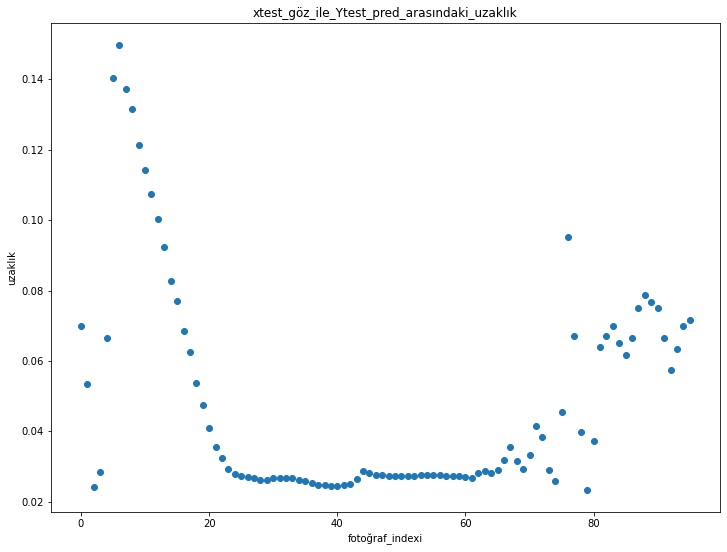

In [62]:
plt.figure(figsize = (12,9))
plt.scatter(range(0,96),distances[0])
plt.xlabel("fotoğraf_indexi")
plt.ylabel("uzaklık")
plt.title("xtest_göz_ile_Ytest_pred_arasındaki_uzaklık")
plt.show()

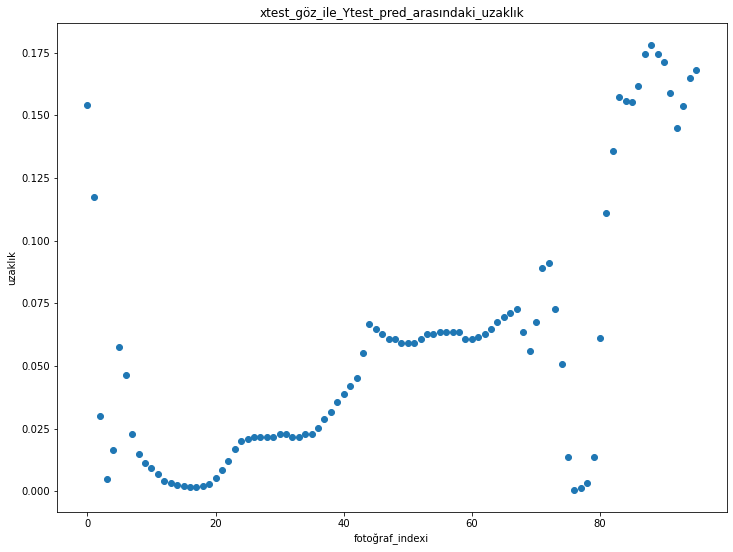

In [63]:
plt.figure(figsize = (12,9))
plt.scatter(range(0,96),distances1[0])
plt.xlabel("fotoğraf_indexi")
plt.ylabel("uzaklık")
plt.title("xtest_göz_ile_Ytest_pred_arasındaki_uzaklık")
plt.show()



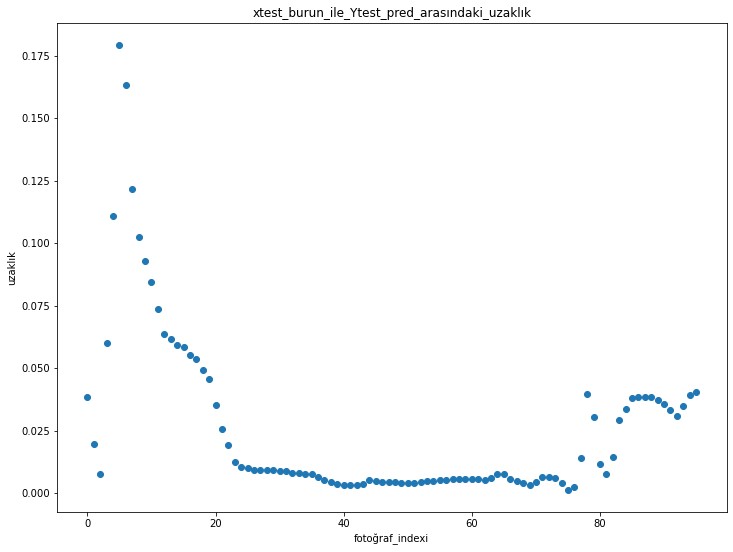

In [64]:
plt.figure(figsize = (12,9))
plt.scatter(range(0,96),distances2[0])
plt.xlabel("fotoğraf_indexi")
plt.ylabel("uzaklık")
plt.title("xtest_burun_ile_Ytest_pred_arasındaki_uzaklık")
plt.show()

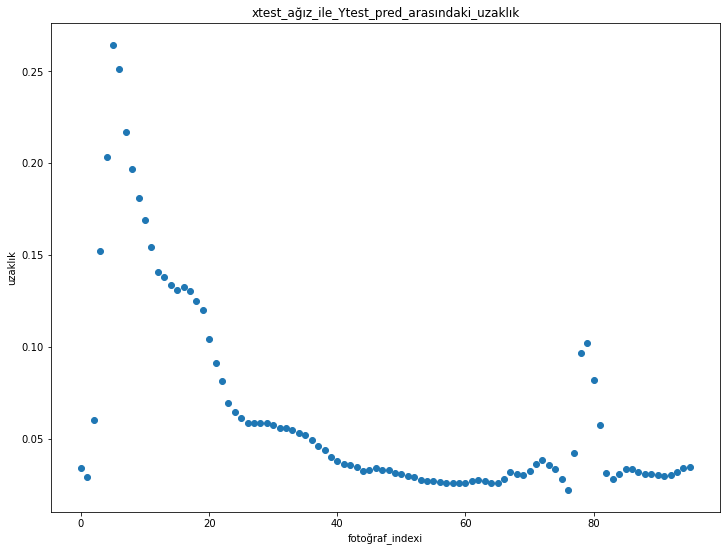

In [65]:
plt.figure(figsize = (12,9))
plt.scatter(range(0,96),distances3[0])
plt.xlabel("fotoğraf_indexi")
plt.ylabel("uzaklık")
plt.title("xtest_ağız_ile_Ytest_pred_arasındaki_uzaklık")
plt.show()

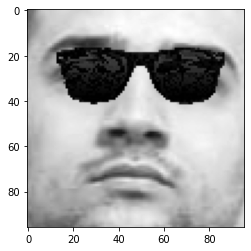

In [61]:
cafer=cv2.imread("1.jpeg",0)
img = cv2.imread('gozluk.png',0)
cafer=cafer.reshape(96,96,1)
cafer=cafer.reshape(1,96,96,1)
cafer_pred= model.predict(cafer)
cafer=cafer.reshape(96,96)
cafer_pred=cafer_pred*96
distance=(cafer_pred[0,0]-cafer_pred[0,2])

resized_image = cv2.resize(img, (int(distance*2)+5,int(distance*2*369/835)))

img2_fg = cv2.bitwise_and(cafer[12:12+resized_image.shape[0],10:10+resized_image.shape[1]],resized_image)
cafer[12:12+resized_image.shape[0],10:10+resized_image.shape[1]]=img2_fg
plt.imshow(cafer,cmap='gray')


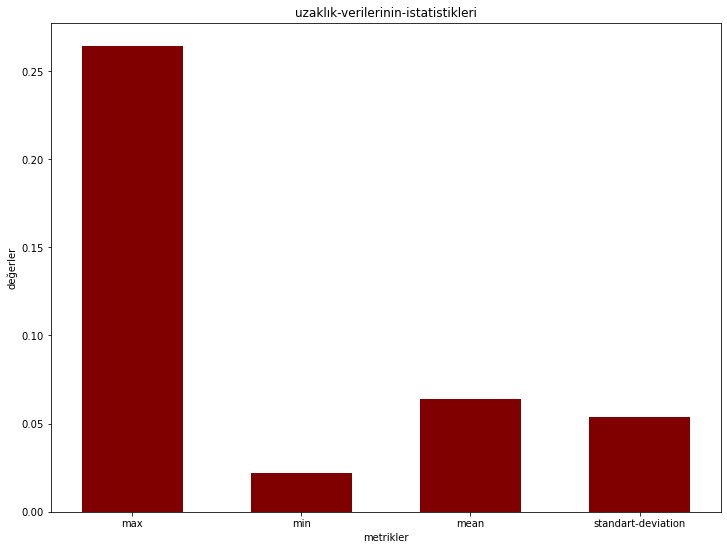

In [84]:
a=[]
b=["max","min","mean","standart-deviation"]
a.append(max(distances3[0]))
a.append(min(distances3[0]))
a.append(distances3[0].mean())
a.append(distances3[0].std())
fig = plt.figure(figsize = (12, 9))
plt.bar(b,a , color ='maroon',width = 0.6)
plt.xlabel("metrikler")
plt.ylabel("değerler")
plt.title("uzaklık-verilerinin-istatistikleri")
plt.show()